In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
dataset = pd.read_csv("bill_authentication.csv")

In [2]:
dataset.head(5)

Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [3]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class']
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.ensemble import RandomForestClassifier

In [4]:
regressor = RandomForestClassifier(n_estimators=20, random_state=0) 

In [5]:
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
d =pd.DataFrame({'original':y_test,'predict':y_pred})
print(d)


      original  predict
1265         1        1
332          0        0
1181         1        1
808          1        1
763          1        1
...        ...      ...
890          1        1
728          0        0
113          0        0
521          0        0
971          1        1

[275 rows x 2 columns]


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def find(y_test,y_pred):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))


In [7]:
find(y_test,y_pred)

[[152   0]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       123

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

1.0


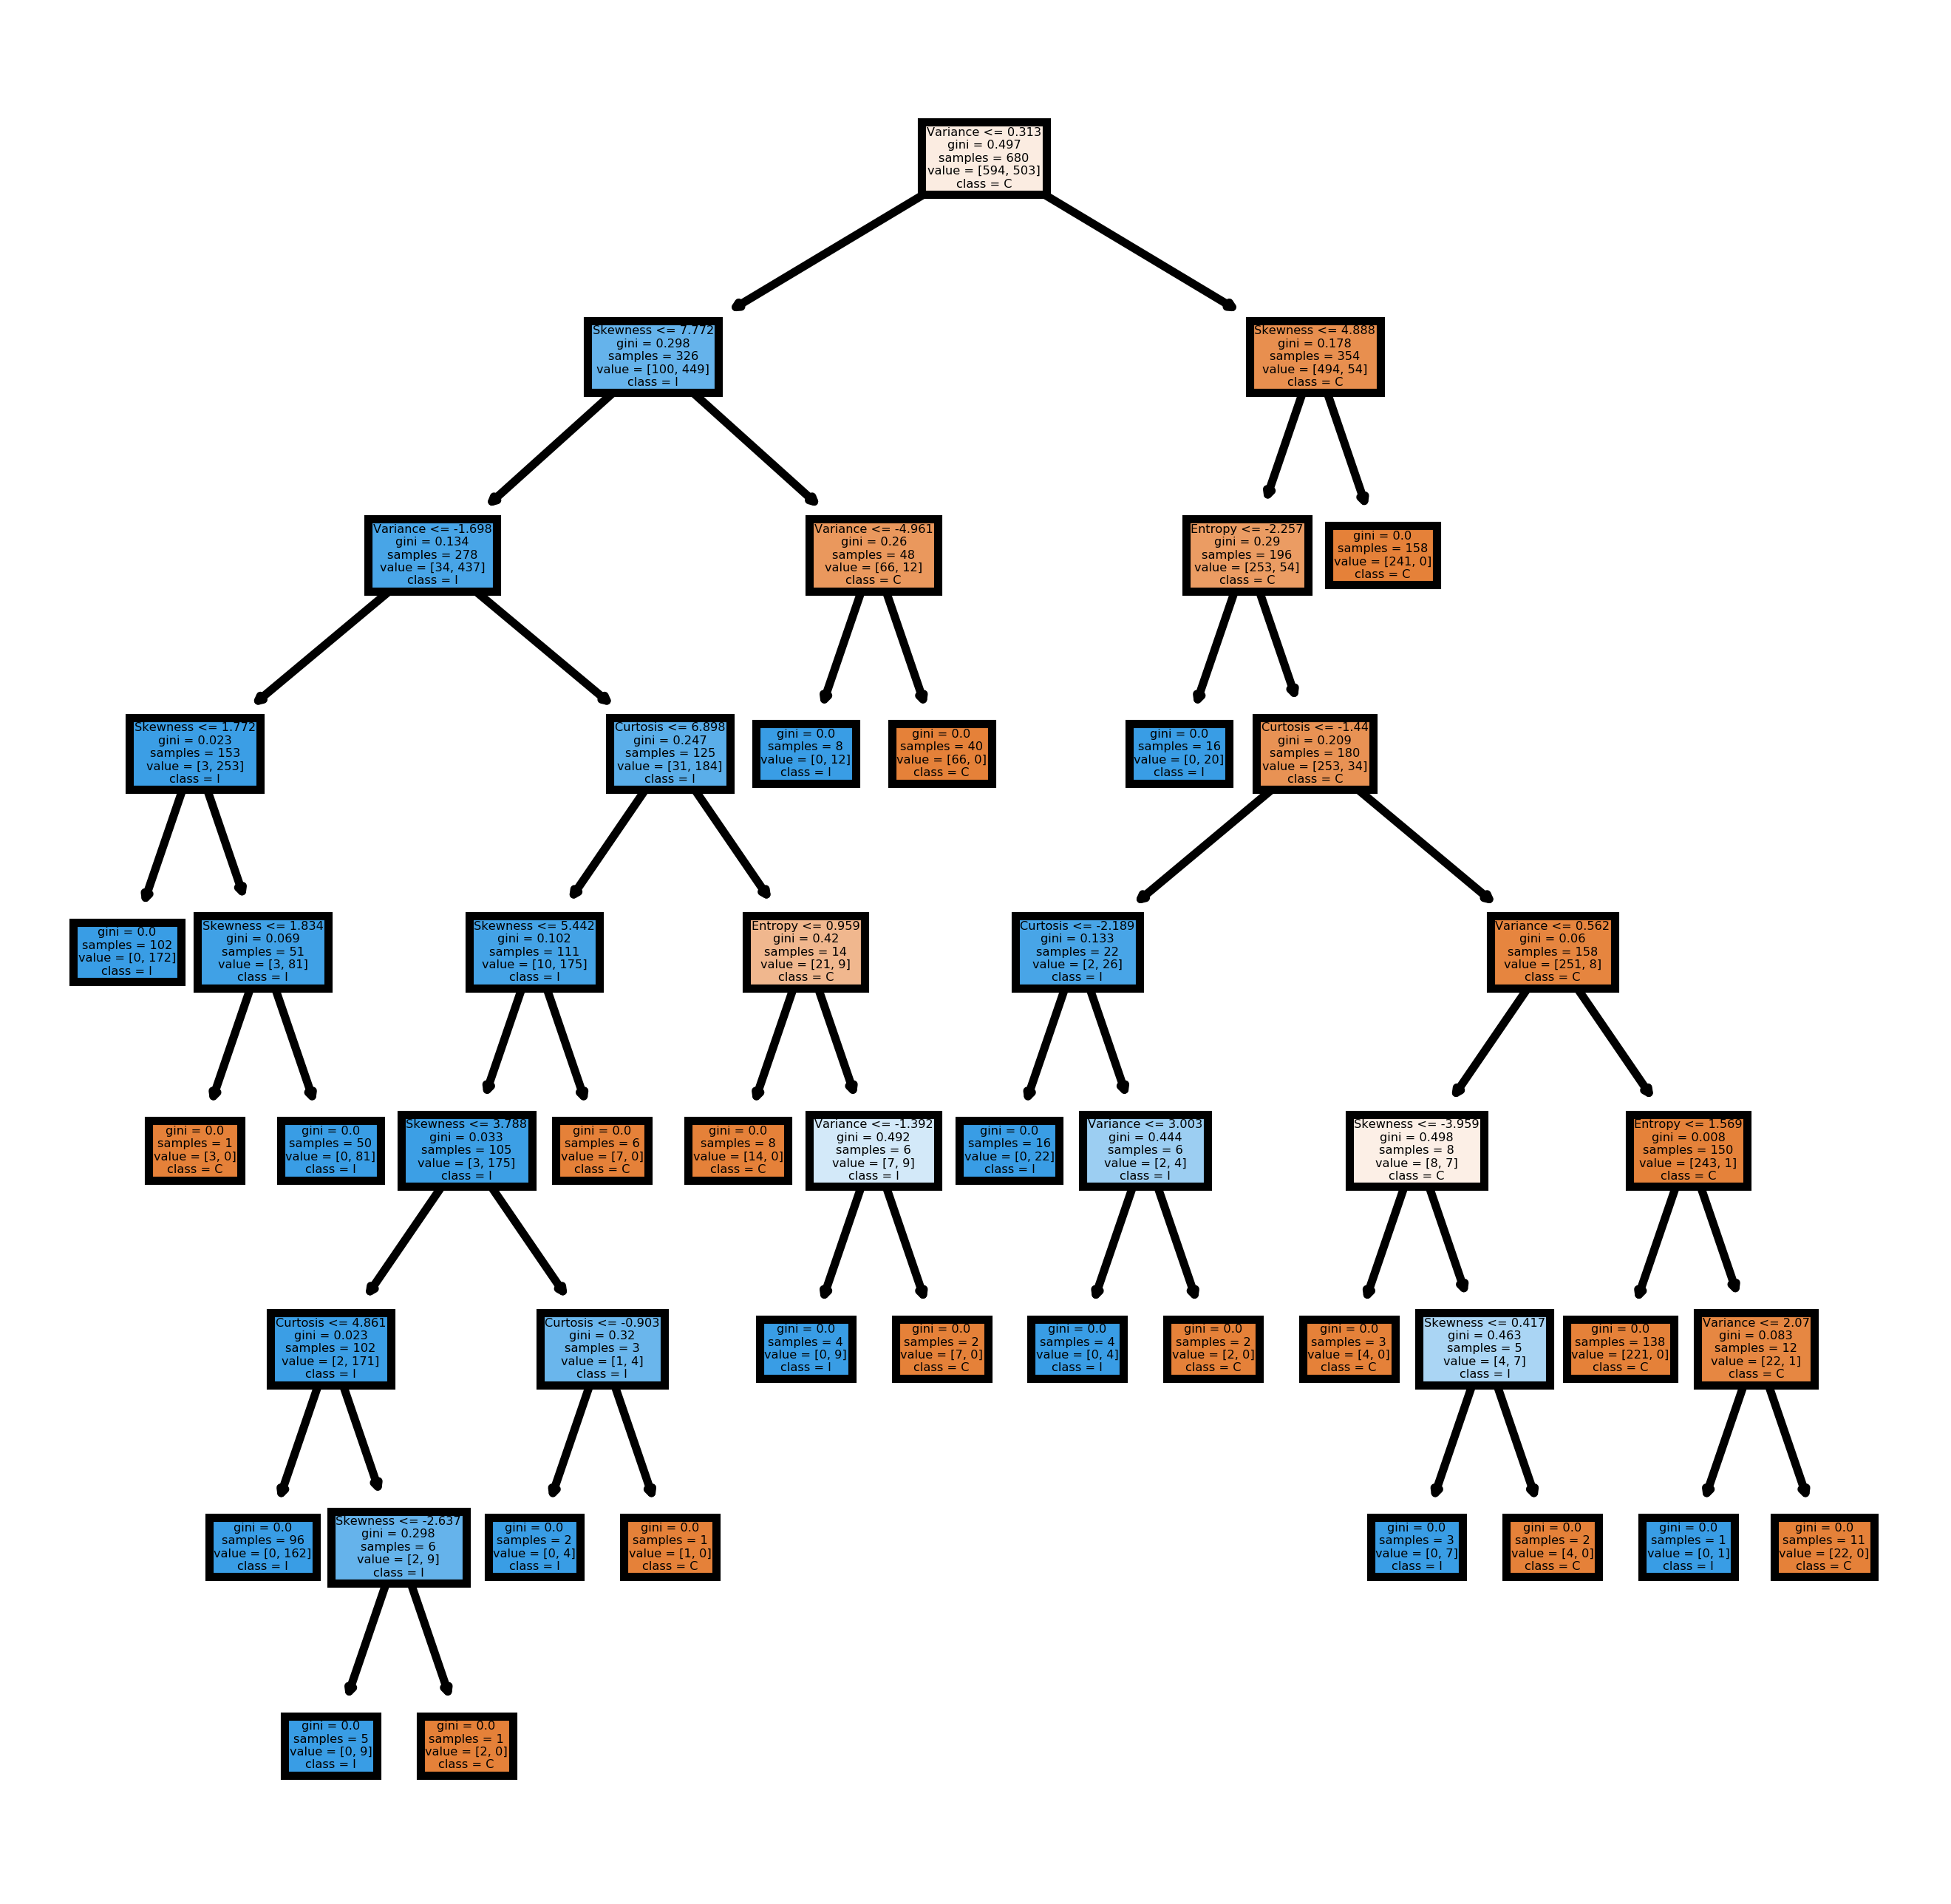

In [8]:
from sklearn import tree#visialize tree
import matplotlib.pyplot as plt
fn=X.columns.values
cn='Class'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(regressor.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);


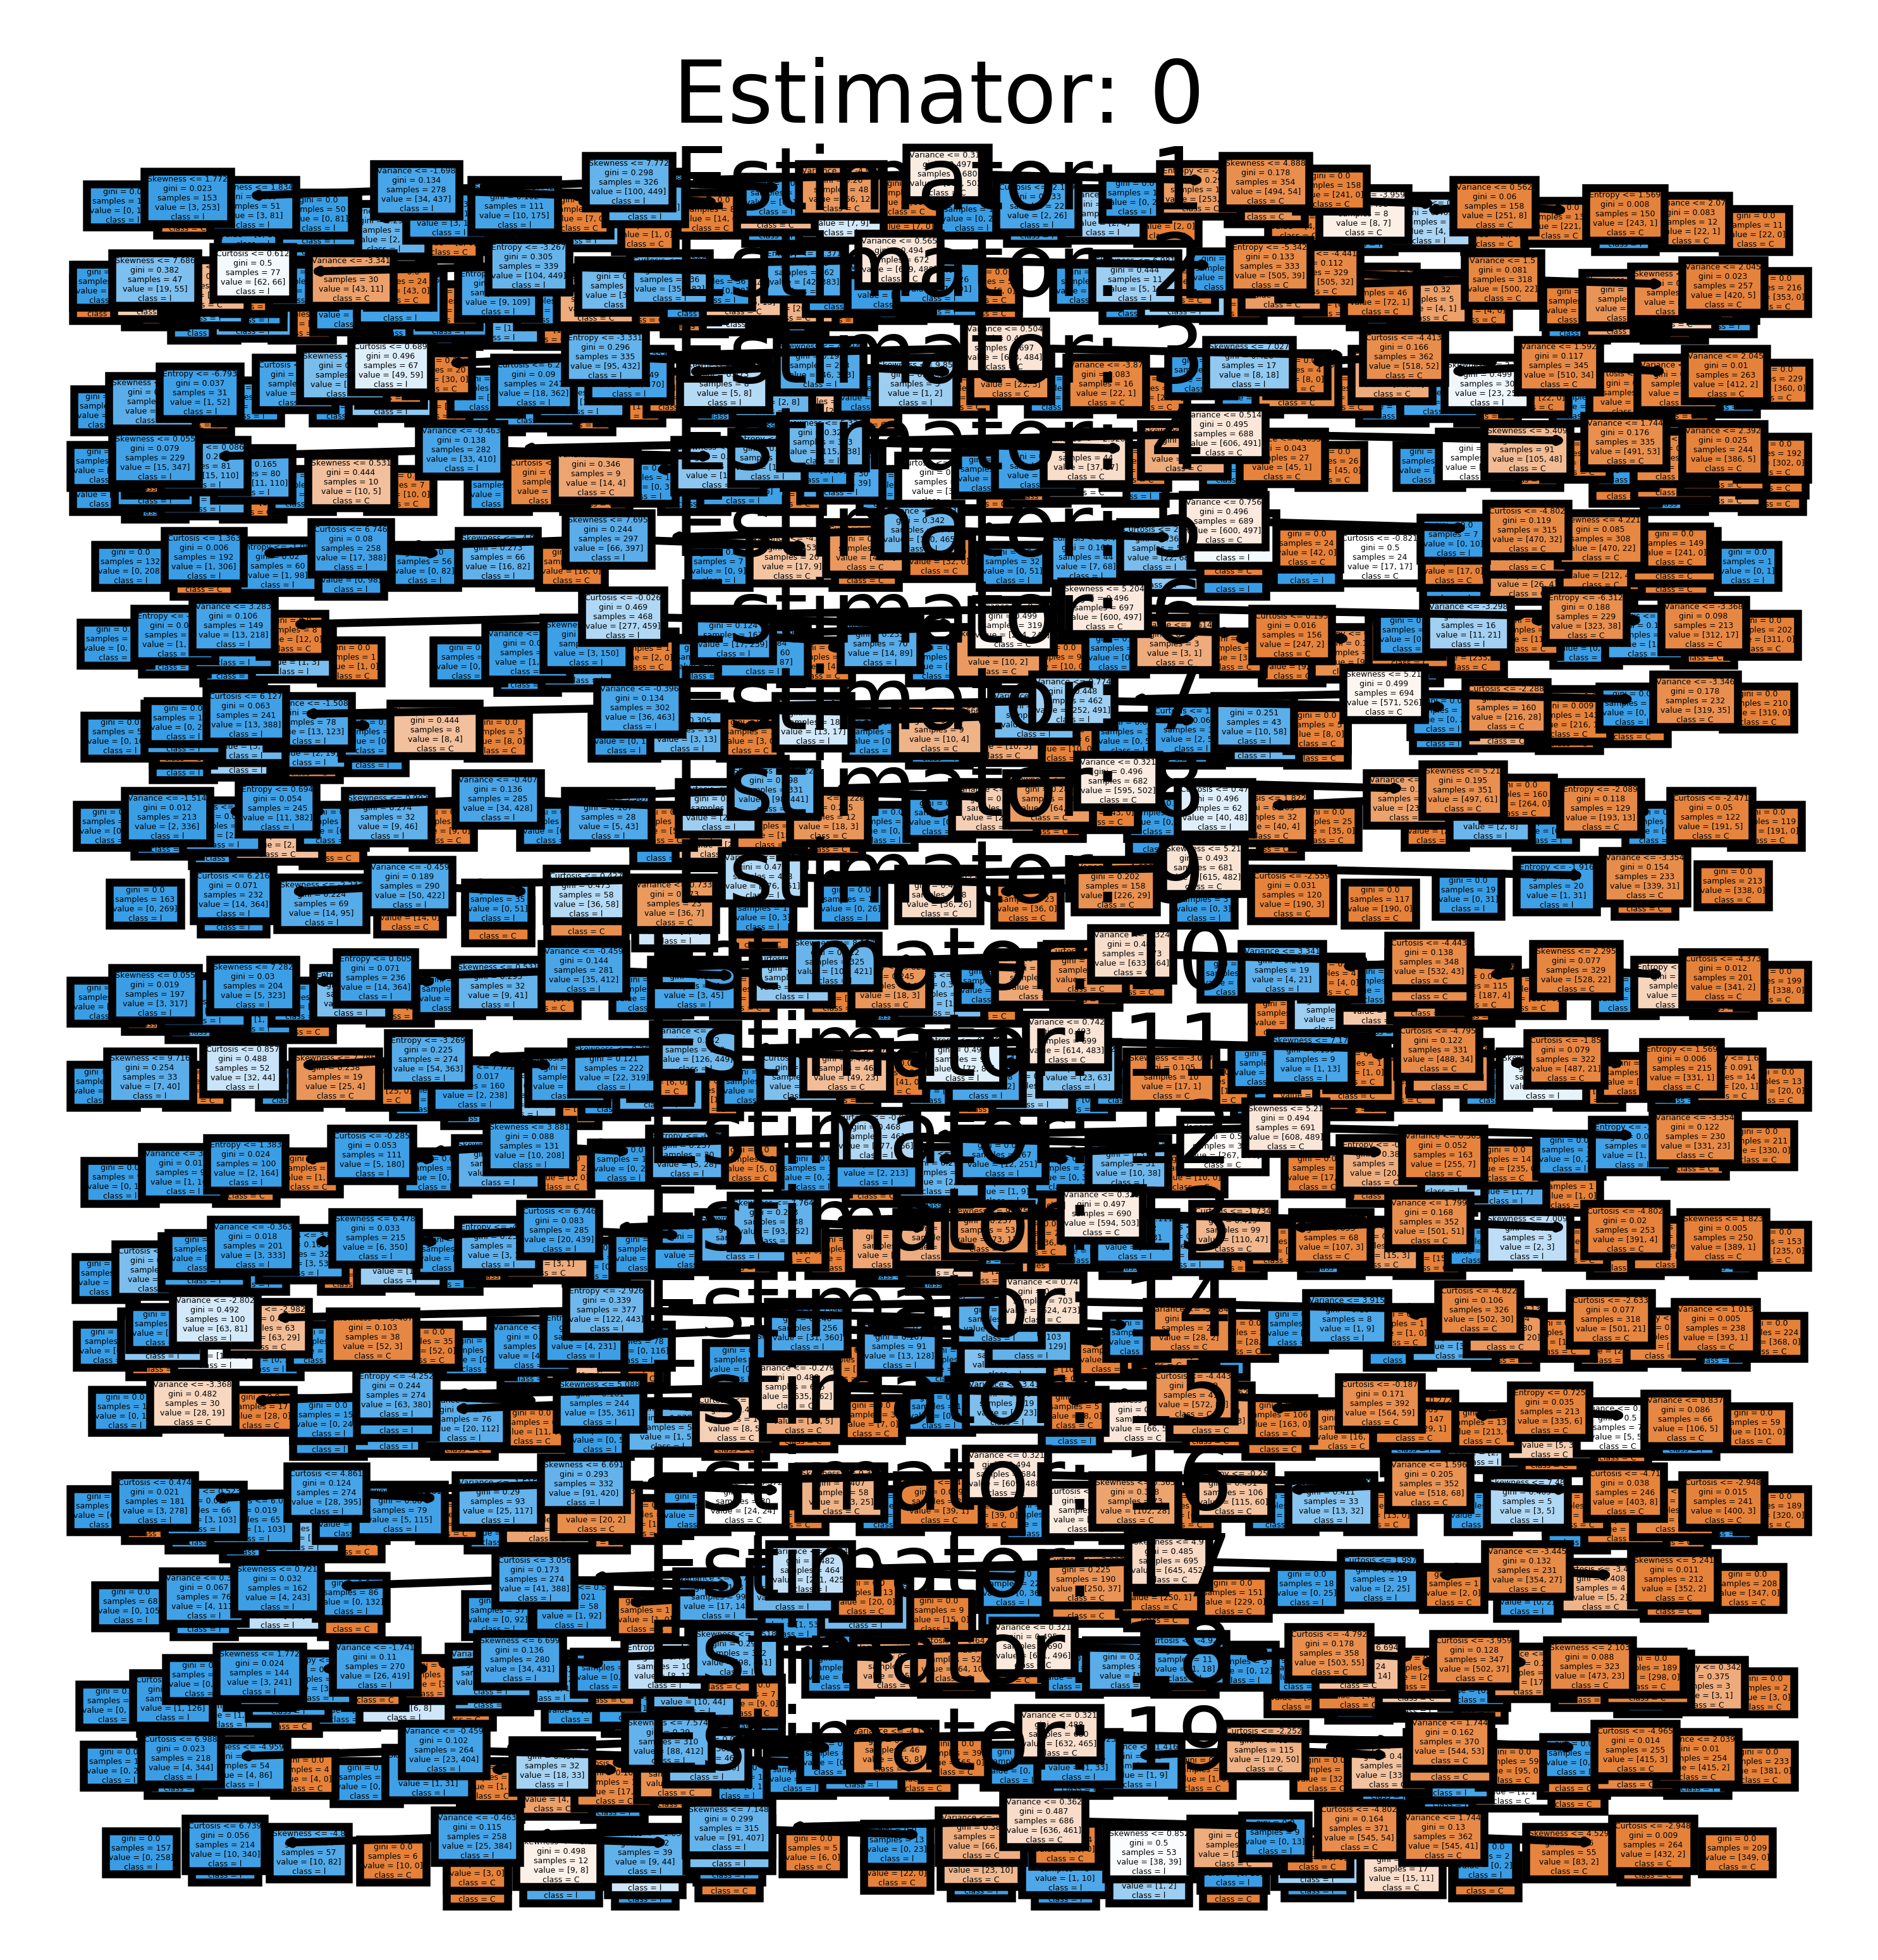

In [9]:
fig, axes = plt.subplots(nrows = 20,ncols = 1,figsize = (4,4), dpi=900)
for index in range(0, 20):
    tree.plot_tree(regressor.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
